In [1]:
#imports

import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#always a good practice to set seed for reproductability

SEED = 10
np.random.seed(SEED)

In [3]:
#reading the data into dataframe

df = pd.read_csv("datasets_228_482_diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#creating a copy to operate on later

df_copy = df.copy(deep = True)

In [6]:
#first look at the columns
#seems as if there are no null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#descriptive statistics
#min values for some fields are 0 which does not make sense
#which means null values have been replaced by zeros

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


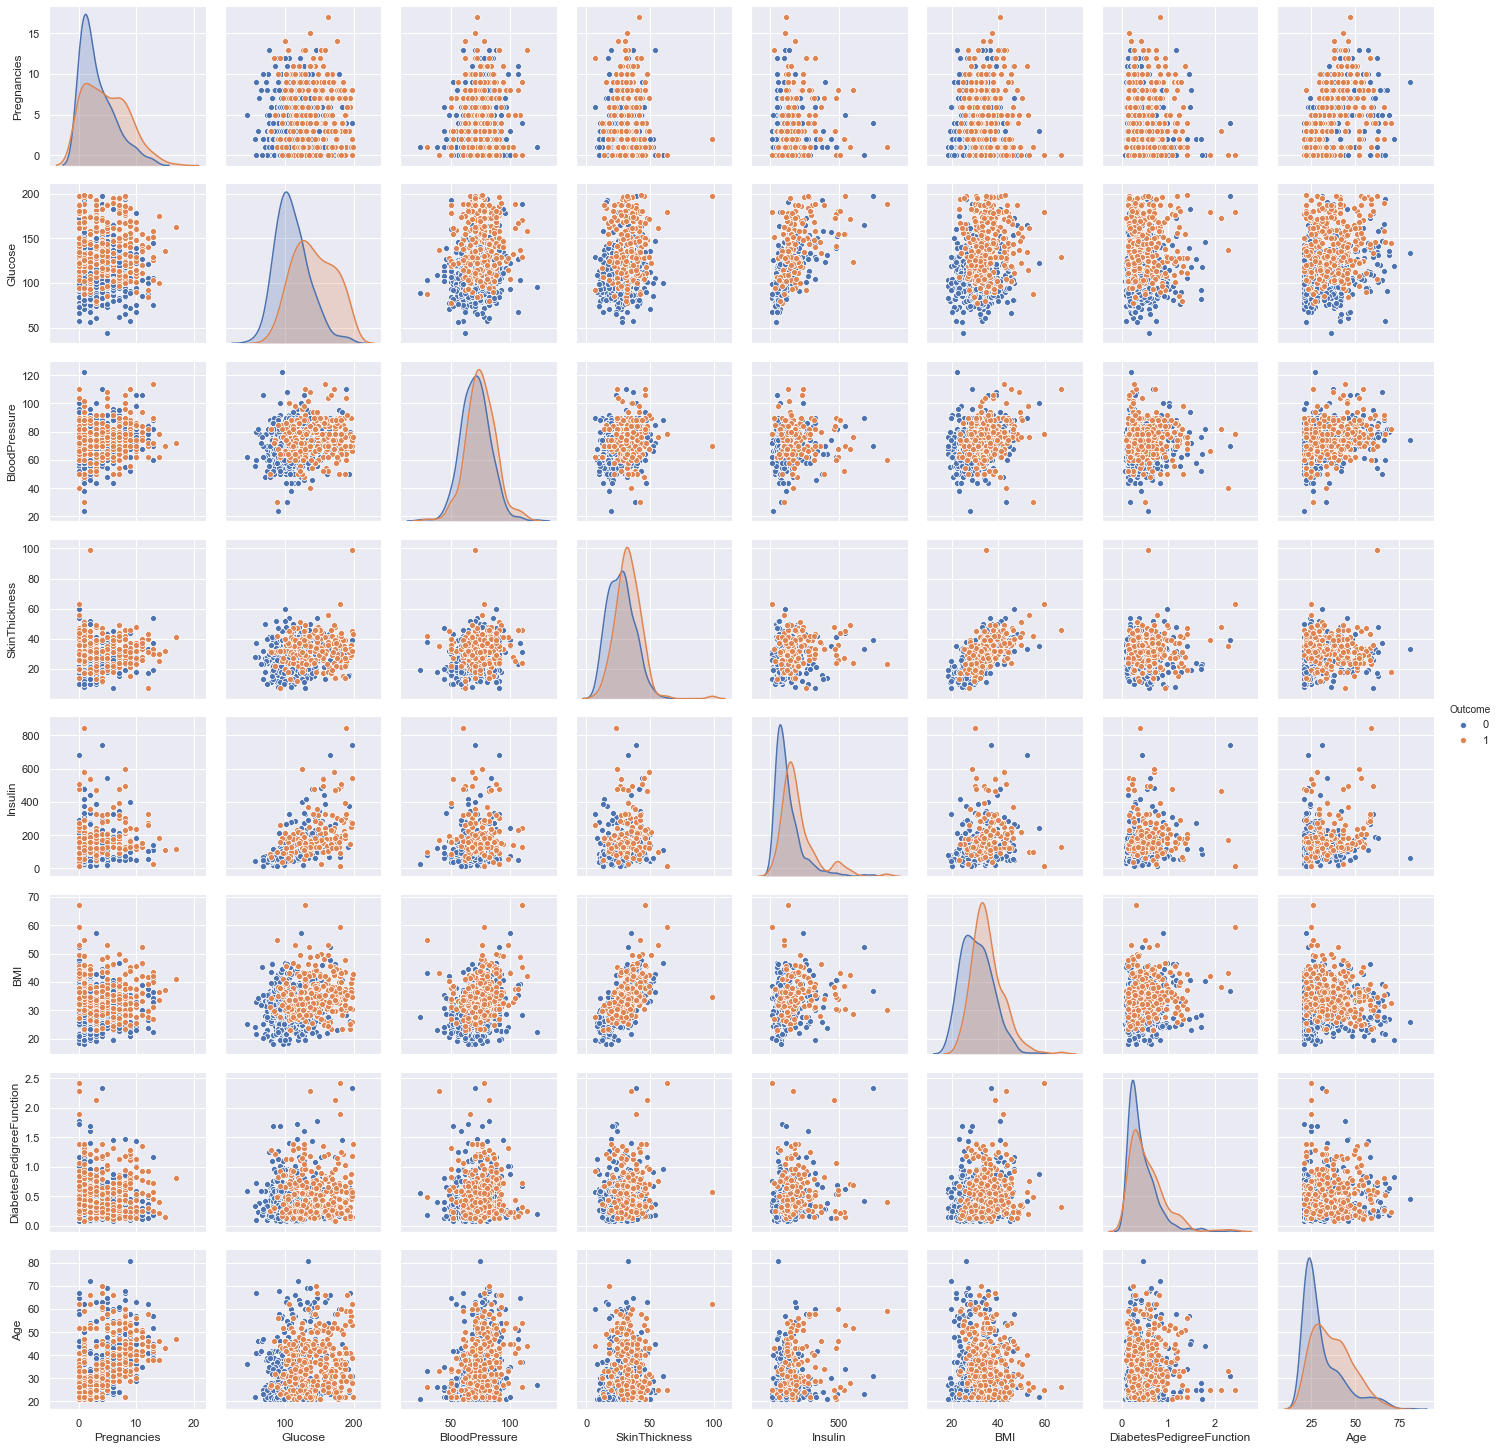

In [99]:
#lets have a look at how the data is distributed

sns.pairplot(df,hue='Outcome')

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#Let's take a look at the missing values
#Replacing 0 by NaN to vizualize the percentage of missing values

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


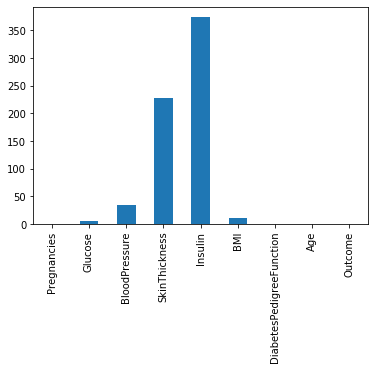

In [13]:
df.isnull().sum().plot(kind='bar')

In [14]:
#aiming to impute the missing values based on their distribution

df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(),inplace=True)

In [15]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


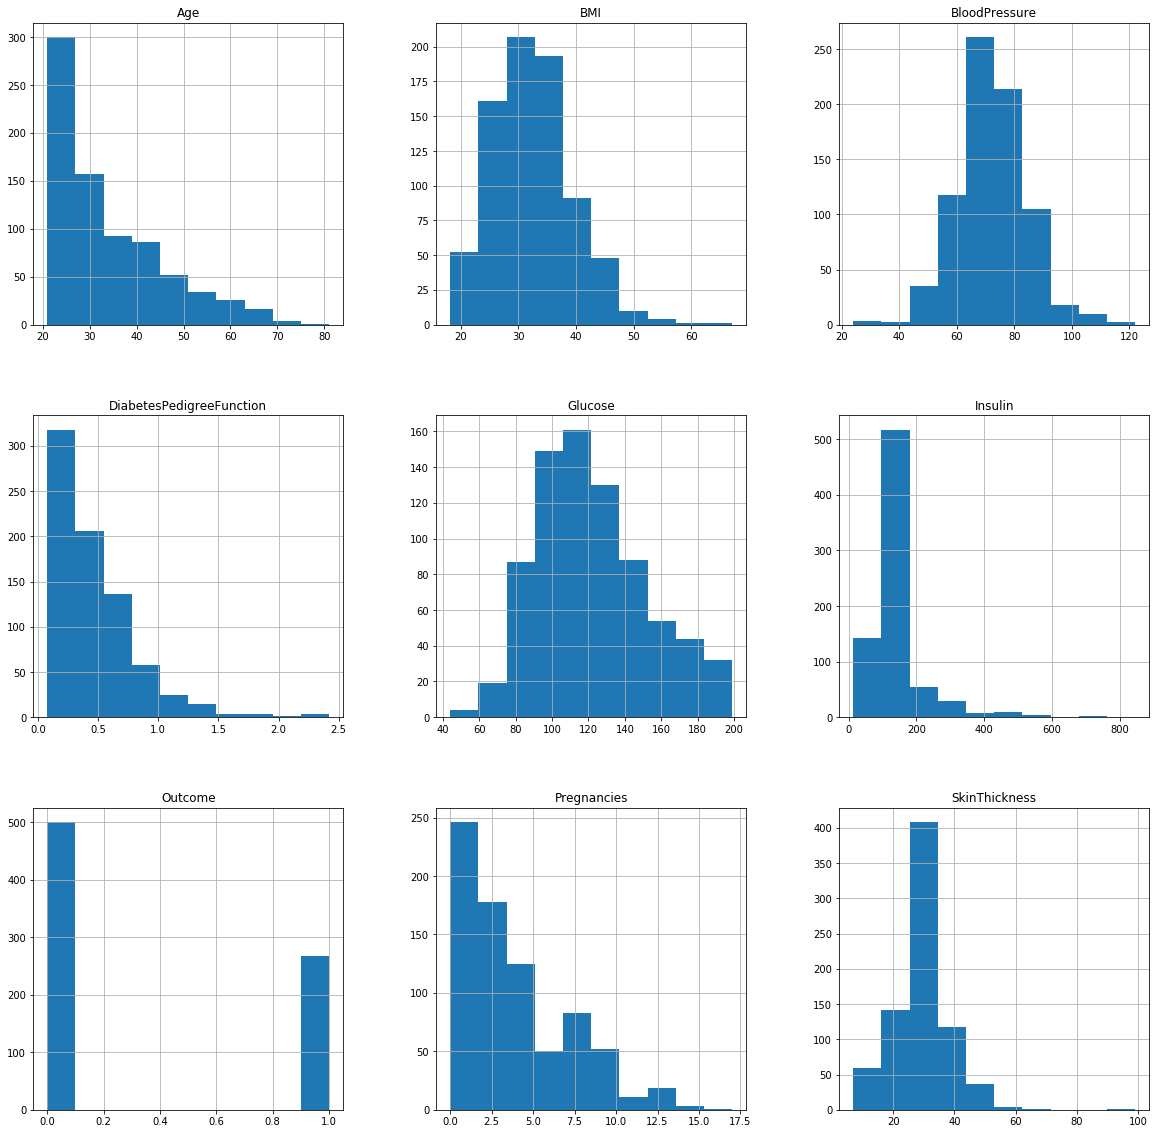

In [16]:
#Checking distribution for cleaned data

p = df_copy.hist(figsize = (20,20))

In [17]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


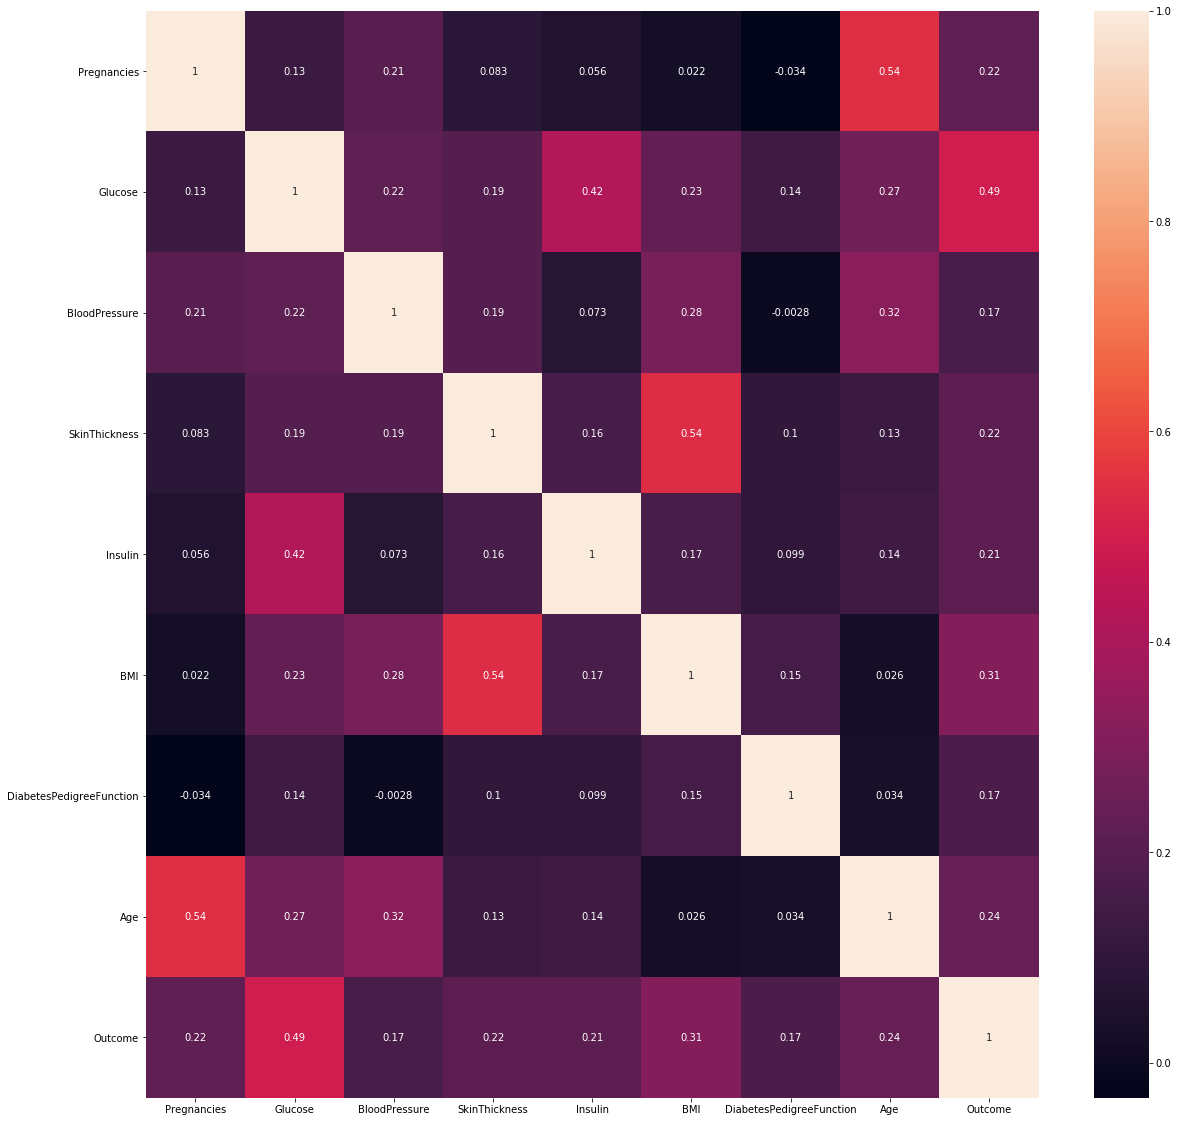

In [18]:
#Let us check correlation between the variables using a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_copy.corr(),annot=True)

Since there is not much correlation between the columns, we can proceed without removing any columns.

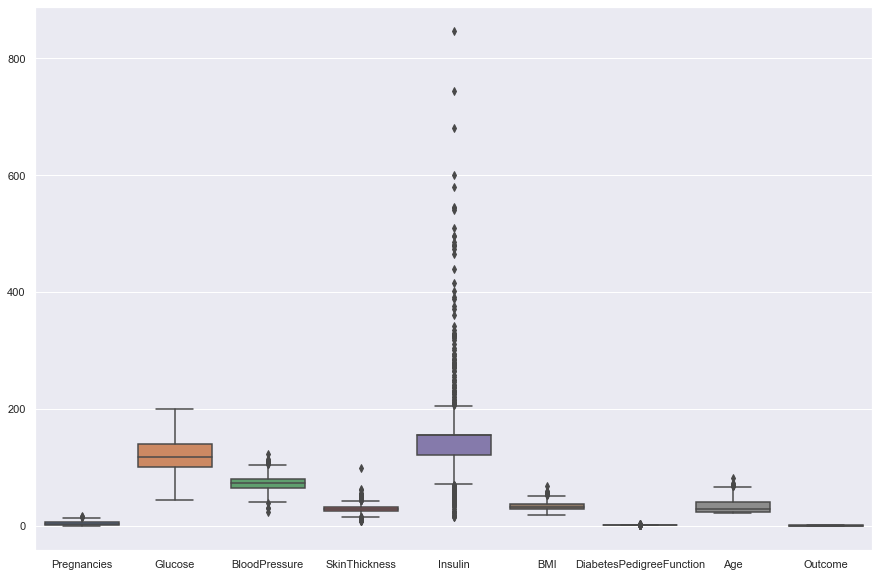

In [20]:
#Let us check for outliers and remove them.

sns.set()
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_copy,ax=ax)

In [28]:
#Removing outliers from diabetes

q = df_copy['Pregnancies'].quantile(0.98)
data_cleaned = df_copy[df_copy['Pregnancies']<q]

In [29]:
#Removing outliers from Skin Thickness

q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

In [31]:
#Removing outliers from Insulin

q = data_cleaned['Insulin'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Insulin'] < q]

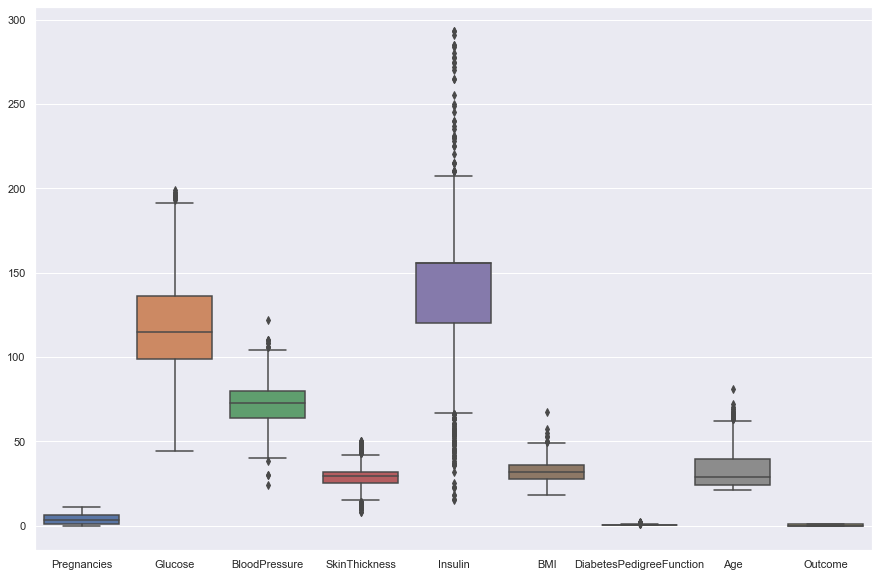

In [32]:
#Checking for removed outliers with cleaned data

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned,ax=ax)

In [34]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [38]:
X = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

In [39]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
import pickle
with open('final_scaler.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.3,random_state=SEED)

In [94]:
accuracy_=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier()]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    accuracy_.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(accuracy_,index=classifiers)   
models_dataframe.columns=['Accuracy'] 

In [95]:
models_dataframe

,Accuracy
Linear Svm,0.780952
Radial Svm,0.752381
Logistic Regression,0.785714
KNN,0.761905
Decision Tree,0.671429
Random Forest,0.738095


In [96]:
#Let us use cross-validation to decide which model is best suited for our data

kfold = KFold(n_splits=20,random_state=SEED)
accuracy_cv = []
accuracy_all_values = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,y_train,cv = kfold,scoring = "accuracy")
    accuracy_cv.append(cv_result.mean())
    accuracy_all_values.append(cv_result)
cross_models_dataframe=pd.DataFrame(accuracy_cv,index=classifiers)   
cross_models_dataframe.columns=['CV Mean']    
cross_models_dataframe

,CV Mean
Linear Svm,0.776083
Radial Svm,0.765750
Logistic Regression,0.771833
KNN,0.749500
Decision Tree,0.729000
Random Forest,0.765833


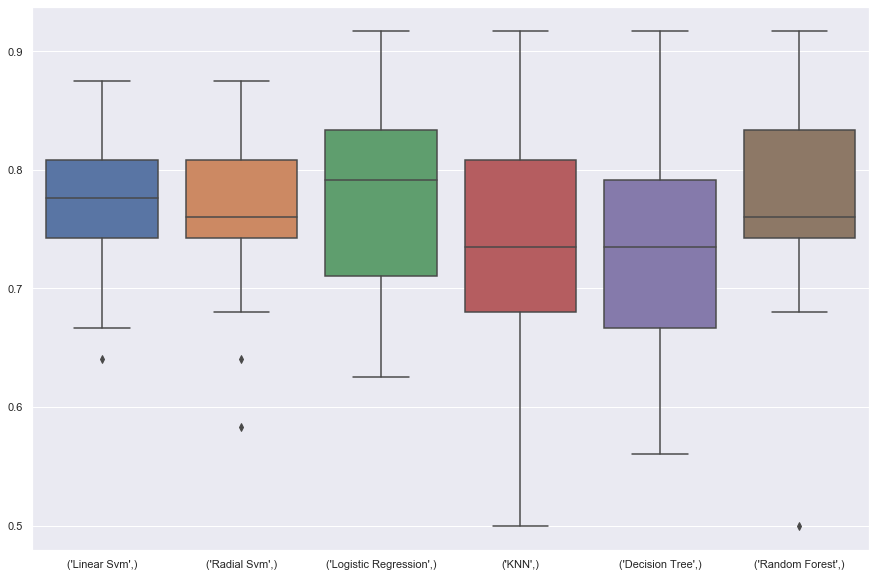

In [97]:
box=pd.DataFrame(accuracy_all_values,index=[classifiers])
fig = plt.figure(figsize=(15,10))
sns.boxplot(data=box.T)
plt.show()

In [101]:
from sklearn.model_selection import GridSearchCV

In [106]:
#Performing Grid Search for KNN

param_grid_knn = {'n_neighbors':np.arange(1,50),'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid_knn,cv=5,verbose=3)
knn_cv.fit(X_train,y_train)

print("Best Score : " + str(knn_cv.best_score_))
print("Best Parameters : " + str(knn_cv.best_params_))

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.697, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.684, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.704, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.745, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.680, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, score=0.697, total=   0.0s
[CV] metric=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=4, weights=distance, score=0.684, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=4, weights=distance, score=0.714, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=4, weights=distance, score=0.765, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=4, weights=distance, score=0.691, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.707, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.735, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.745, tot

[CV]  metric=euclidean, n_neighbors=12, weights=uniform, score=0.847, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=12, weights=uniform, score=0.753, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.737, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.745, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.735, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.

[CV]  metric=euclidean, n_neighbors=20, weights=uniform, score=0.798, total=   0.0s
[CV] metric=euclidean, n_neighbors=20, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=20, weights=uniform, score=0.755, total=   0.0s
[CV] metric=euclidean, n_neighbors=20, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=20, weights=uniform, score=0.735, total=   0.0s
[CV] metric=euclidean, n_neighbors=20, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=20, weights=uniform, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=20, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=20, weights=uniform, score=0.742, total=   0.0s
[CV] metric=euclidean, n_neighbors=20, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=20, weights=distance, score=0.768, total=   0.0s
[CV] metric=euclidean, n_neighbors=20, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=20, weights=distance, score=0.796

[CV]  metric=euclidean, n_neighbors=26, weights=distance, score=0.753, total=   0.0s
[CV] metric=euclidean, n_neighbors=27, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=27, weights=uniform, score=0.778, total=   0.0s
[CV] metric=euclidean, n_neighbors=27, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=27, weights=uniform, score=0.755, total=   0.0s
[CV] metric=euclidean, n_neighbors=27, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=27, weights=uniform, score=0.724, total=   0.0s
[CV] metric=euclidean, n_neighbors=27, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=27, weights=uniform, score=0.806, total=   0.0s
[CV] metric=euclidean, n_neighbors=27, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=27, weights=uniform, score=0.773, total=   0.0s
[CV] metric=euclidean, n_neighbors=27, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=27, weights=distance, score=0.788

[CV]  metric=euclidean, n_neighbors=33, weights=distance, score=0.796, total=   0.0s
[CV] metric=euclidean, n_neighbors=33, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=33, weights=distance, score=0.763, total=   0.0s
[CV] metric=euclidean, n_neighbors=34, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=34, weights=uniform, score=0.778, total=   0.0s
[CV] metric=euclidean, n_neighbors=34, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=34, weights=uniform, score=0.745, total=   0.0s
[CV] metric=euclidean, n_neighbors=34, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=34, weights=uniform, score=0.714, total=   0.0s
[CV] metric=euclidean, n_neighbors=34, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=34, weights=uniform, score=0.776, total=   0.0s
[CV] metric=euclidean, n_neighbors=34, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=34, weights=uniform, score=0.753

[CV]  metric=euclidean, n_neighbors=40, weights=distance, score=0.786, total=   0.0s
[CV] metric=euclidean, n_neighbors=40, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=40, weights=distance, score=0.784, total=   0.0s
[CV] metric=euclidean, n_neighbors=41, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=41, weights=uniform, score=0.768, total=   0.0s
[CV] metric=euclidean, n_neighbors=41, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=41, weights=uniform, score=0.776, total=   0.0s
[CV] metric=euclidean, n_neighbors=41, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=41, weights=uniform, score=0.745, total=   0.0s
[CV] metric=euclidean, n_neighbors=41, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=41, weights=uniform, score=0.765, total=   0.0s
[CV] metric=euclidean, n_neighbors=41, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=41, weights=uniform, score=0.773

[CV]  metric=euclidean, n_neighbors=47, weights=distance, score=0.745, total=   0.0s
[CV] metric=euclidean, n_neighbors=47, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=47, weights=distance, score=0.776, total=   0.0s
[CV] metric=euclidean, n_neighbors=47, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=47, weights=distance, score=0.763, total=   0.0s
[CV] metric=euclidean, n_neighbors=48, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=48, weights=uniform, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=48, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=48, weights=uniform, score=0.786, total=   0.0s
[CV] metric=euclidean, n_neighbors=48, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=48, weights=uniform, score=0.735, total=   0.0s
[CV] metric=euclidean, n_neighbors=48, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=48, weights=uniform, score=0.75

[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=6, weights=uniform, score=0.714, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=6, weights=uniform, score=0.776, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=6, weights=uniform, score=0.711, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=6, weights=distance, score=0.707, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=6, weights=distance, score=0.724, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=6, weights=distance, score=0.694, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=distance ...............
[C

[CV]  metric=manhattan, n_neighbors=14, weights=uniform, score=0.796, total=   0.0s
[CV] metric=manhattan, n_neighbors=14, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=14, weights=uniform, score=0.714, total=   0.0s
[CV] metric=manhattan, n_neighbors=14, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=14, weights=uniform, score=0.837, total=   0.0s
[CV] metric=manhattan, n_neighbors=14, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=14, weights=uniform, score=0.742, total=   0.0s
[CV] metric=manhattan, n_neighbors=14, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=14, weights=distance, score=0.768, total=   0.0s
[CV] metric=manhattan, n_neighbors=14, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=14, weights=distance, score=0.745, total=   0.0s
[CV] metric=manhattan, n_neighbors=14, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=14, weights=distance, score=0.73

[CV]  metric=manhattan, n_neighbors=22, weights=uniform, score=0.735, total=   0.0s
[CV] metric=manhattan, n_neighbors=22, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=22, weights=uniform, score=0.714, total=   0.0s
[CV] metric=manhattan, n_neighbors=22, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=22, weights=uniform, score=0.806, total=   0.0s
[CV] metric=manhattan, n_neighbors=22, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=22, weights=uniform, score=0.742, total=   0.0s
[CV] metric=manhattan, n_neighbors=22, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=22, weights=distance, score=0.768, total=   0.0s
[CV] metric=manhattan, n_neighbors=22, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=22, weights=distance, score=0.765, total=   0.0s
[CV] metric=manhattan, n_neighbors=22, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=22, weights=distance, score=0.69

[CV]  metric=manhattan, n_neighbors=29, weights=uniform, score=0.763, total=   0.0s
[CV] metric=manhattan, n_neighbors=29, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=29, weights=distance, score=0.768, total=   0.0s
[CV] metric=manhattan, n_neighbors=29, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=29, weights=distance, score=0.735, total=   0.0s
[CV] metric=manhattan, n_neighbors=29, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=29, weights=distance, score=0.724, total=   0.0s
[CV] metric=manhattan, n_neighbors=29, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=29, weights=distance, score=0.796, total=   0.0s
[CV] metric=manhattan, n_neighbors=29, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=29, weights=distance, score=0.763, total=   0.0s
[CV] metric=manhattan, n_neighbors=30, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=30, weights=uniform, score=0.

[CV]  metric=manhattan, n_neighbors=36, weights=distance, score=0.755, total=   0.0s
[CV] metric=manhattan, n_neighbors=36, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=36, weights=distance, score=0.724, total=   0.0s
[CV] metric=manhattan, n_neighbors=36, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=36, weights=distance, score=0.806, total=   0.0s
[CV] metric=manhattan, n_neighbors=36, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=36, weights=distance, score=0.763, total=   0.0s
[CV] metric=manhattan, n_neighbors=37, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=37, weights=uniform, score=0.798, total=   0.0s
[CV] metric=manhattan, n_neighbors=37, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=37, weights=uniform, score=0.755, total=   0.0s
[CV] metric=manhattan, n_neighbors=37, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=37, weights=uniform, score=0.7

[CV] metric=manhattan, n_neighbors=43, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=43, weights=distance, score=0.798, total=   0.0s
[CV] metric=manhattan, n_neighbors=43, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=43, weights=distance, score=0.735, total=   0.0s
[CV] metric=manhattan, n_neighbors=43, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=43, weights=distance, score=0.724, total=   0.0s
[CV] metric=manhattan, n_neighbors=43, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=43, weights=distance, score=0.796, total=   0.0s
[CV] metric=manhattan, n_neighbors=43, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=43, weights=distance, score=0.753, total=   0.0s
[CV] metric=manhattan, n_neighbors=44, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=44, weights=uniform, score=0.798, total=   0.0s
[CV] metric=manhattan, n_neighbors=44, weights=uniform ..........

[Parallel(n_jobs=1)]: Done 980 out of 980 | elapsed:    5.1s finished


In [110]:
#Let us test the final accuracy on the test set after creating a new model

knn_final = KNeighborsClassifier(n_neighbors=17)
knn_final.fit(X_train,y_train)
prediction = knn_final.predict(X_test)
knn_final_accuracy = metrics.accuracy_score(prediction,y_test)
knn_final_accuracy

0.7714285714285715

In [113]:
#Since Logistic Regression has been giving us the best results, let is optimize it using GridSearch and save the model for future use

param_grid_log_reg = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
log_reg = LogisticRegression()
log_reg_cv = GridSearchCV(log_reg,param_grid_log_reg,cv=5,verbose=3)
log_reg_cv.fit(X_train,y_train)

print("Best Score : " + str(log_reg_cv.best_score_))
print("Best Parameters : " + str(log_reg_cv.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.667, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.673, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.673, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.673, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.670, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.747, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished


In [114]:
#Let us test the final accuracy on the test set after creating a new model

log_reg_final = LogisticRegression(C=0.01,penalty='l2')
log_reg_final.fit(X_train,y_train)
prediction = log_reg_final.predict(X_test)
log_reg_final_accuracy = metrics.accuracy_score(prediction,y_test)
log_reg_final_accuracy

0.7666666666666667

In [115]:
import pickle
with open('final_log_reg.sav', 'wb') as f:
    pickle.dump(log_reg_final,f)

In [117]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1
